In [96]:
import matplotlib.pyplot as plt
import torch, torch.nn as nn
from tqdm import trange

from Datasets.datasets import MNIST_DataLoader, stratified_split
from Models.sequential import Sequential_Model
from Layers.linear import LinearLayer
from Layers.conv import Conv2DLayer
from Activations.relu import relu
from Activations.sigmoid import sigmoid
from Loss_Func.log_loss import log_loss
from Metrics.acc import accuracy
from Layers.flatten import Flatten

In [97]:
mnist_dataloader = MNIST_DataLoader("./Datasets/MNIST/")
X_train, y_train, X_test, y_test = mnist_dataloader.load_data()

In [98]:
X_train, y_train, X_val, y_val = stratified_split(X_train, y_train, val_split=0.95)

In [99]:
X_train.shape, X_val.shape, X_test.shape

((2996, 28, 28), (57004, 28, 28), (10000, 28, 28))

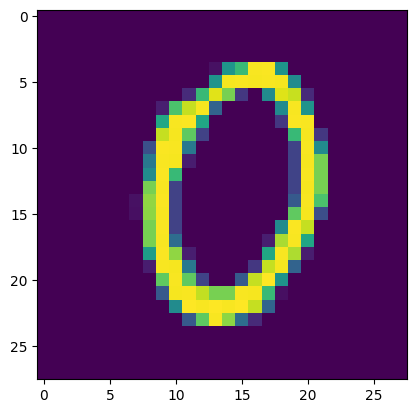

In [100]:
plt.imshow(X_train[0])

In [81]:
X_train = torch.unsqueeze( torch.tensor(X_train), 1)
y_train = torch.tensor(y_train==5, dtype=torch.int8)

shuffled_idxs = torch.randperm(y_train.shape[0])
X_train, y_train = X_train[shuffled_idxs], y_train[shuffled_idxs]

In [89]:
model = Sequential_Model(
            [Conv2DLayer(window_size=(3,3), channels_in=1, channels_out=8),
             relu(),
             Conv2DLayer(window_size=(3,3), channels_in=8, channels_out=4),
             relu(),
             Flatten(),
             LinearLayer(24*24*4,1),
             sigmoid()], log_loss
        )

In [90]:
preds = model.forward_pass(X_train[0])
print(preds )

tensor([[1.]])


In [91]:
loss = model.loss_calc(y_train[0], preds)

In [92]:
model.backward_pass()

In [93]:
epochs = 1
loss_history = []
acc_history = []

for i in range(epochs):
    for idx in trange(X_train.shape[0]):
        preds = model.forward_pass(X_train[idx])
        #print(preds, y_train[idx])
        loss = model.loss_calc(y_train[idx], preds)
        model.backward_pass()
        model.step(1e-3)
        
        loss_history.append(loss)
        acc_history.append(accuracy(torch.Tensor([y_train[idx]]), preds))

100%|█████████████████████████████████████████| 2996/2996 [16:08<00:00,  3.09it/s]


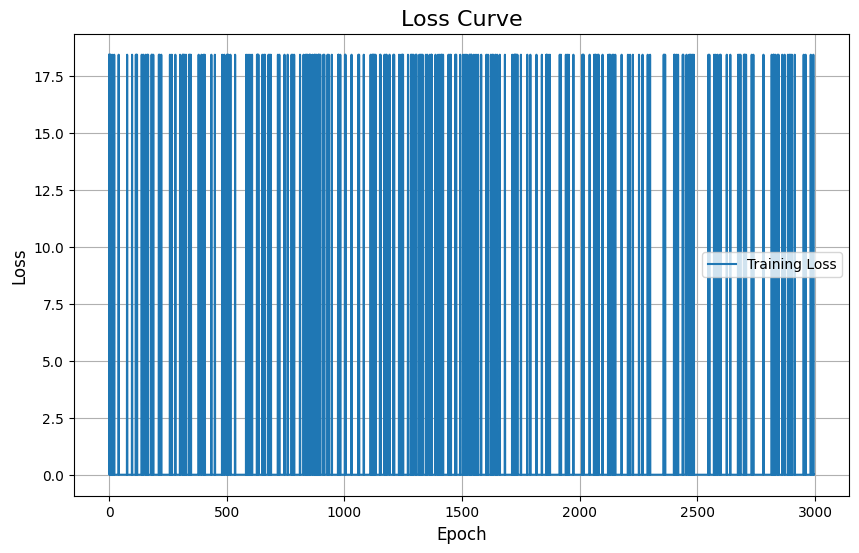

In [94]:
import numpy as np
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(loss_history)), loss_history, label='Training Loss')
plt.title('Loss Curve', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

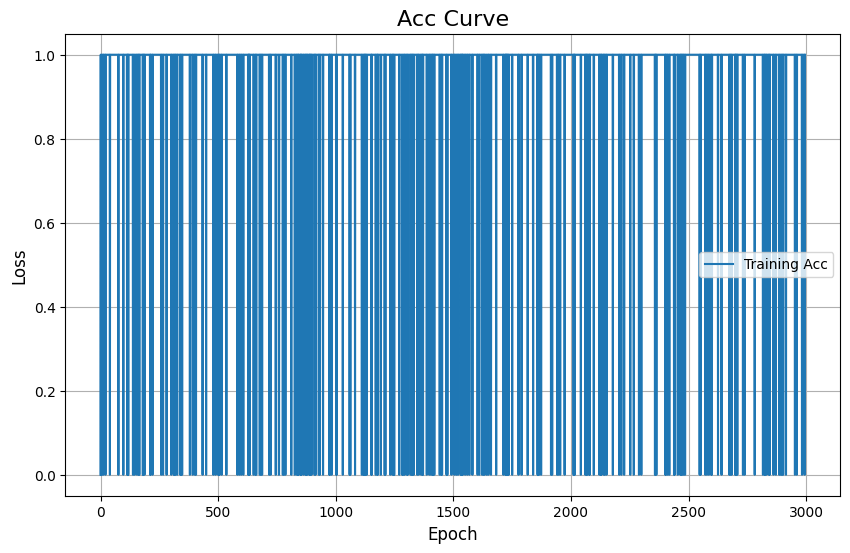

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(acc_history)), acc_history, label='Training Acc')
plt.title('Acc Curve', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)